In [1]:
import pandas as pd
import json

# Load metrics
with open('metrics.json', 'r') as f:
    metrics = json.load(f)

# Load predictions
df = pd.read_csv('predictions.csv')

# Quick inspection
print(df.head())
print(df.columns)
print(metrics)


   num_lines  loop_count  max_loop_depth  uses_recursion  input_size  \
0          5           2               2               1          50   
1          5           2               2               1         200   
2         10           4               3               1        1000   
3          5           1               1               0       10000   
4          5           1               1               0         100   

            label                                               code  \
0    sort_builtin  def sort_arr(arr):\n    for i in range(len(arr...   
1    sort_builtin  def sort_arr(arr):\n    for i in range(len(arr...   
2  graph_dijkstra  def shortest_path(graph, src):\n    dist = {}\...   
3     search_hash  def find_val(arr, x):\n    for v in arr:\n    ...   
4     search_hash  def find_val(arr, x):\n    for v in arr:\n    ...   

     pred_label  
0  sort_builtin  
1  sort_builtin  
2  sort_builtin  
3   search_hash  
4   search_hash  
Index(['num_lines', 'loop_

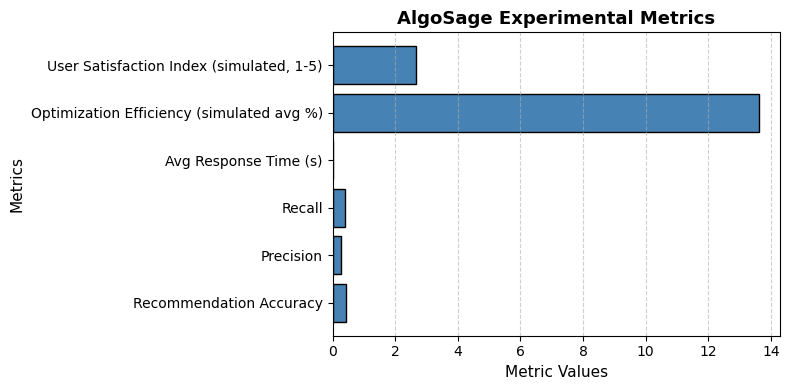

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Horizontal bar chart of metrics
keys = [k for k in metrics.keys() if k != 'Test Set Size']
values = [metrics[k] for k in keys]

plt.figure(figsize=(8,4))
plt.barh(keys, values, color='steelblue', edgecolor='black')
plt.title("AlgoSage Experimental Metrics", fontsize=13, fontweight='bold')
plt.xlabel("Metric Values", fontsize=11)
plt.ylabel("Metrics", fontsize=11)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.savefig("algosage_metrics.png", dpi=300)
plt.show()


In [3]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Correct column names
y_true = df['label']
y_pred = df['pred_label']

# Overall accuracy
acc = accuracy_score(y_true, y_pred)
print(f"Overall Recommendation Accuracy: {acc*100:.2f}%")

# Classification report
print("\n=== Classification Report ===")
print(classification_report(y_true, y_pred))


Overall Recommendation Accuracy: 41.50%

=== Classification Report ===
                precision    recall  f1-score   support

graph_dijkstra       0.00      0.00      0.00        44
   search_hash       1.00      1.00      1.00        38
  sort_builtin       0.28      1.00      0.43        45
    sort_merge       0.00      0.00      0.00        34
    sort_quick       0.00      0.00      0.00        39

      accuracy                           0.41       200
     macro avg       0.26      0.40      0.29       200
  weighted avg       0.25      0.41      0.29       200



C:\Users\kavya\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\kavya\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\kavya\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


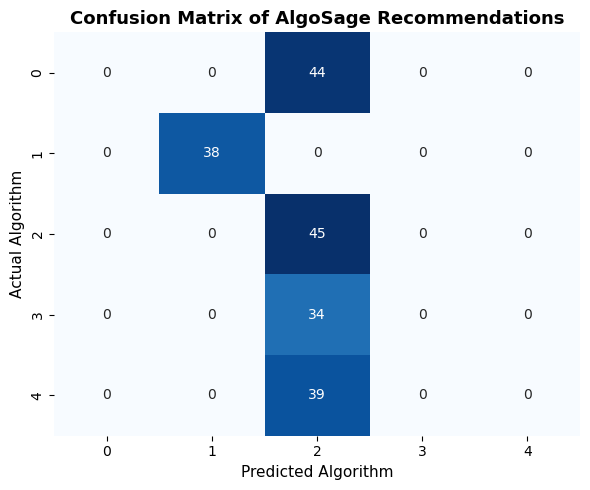

In [4]:
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Confusion Matrix of AlgoSage Recommendations", fontsize=13, fontweight='bold')
plt.xlabel("Predicted Algorithm", fontsize=11)
plt.ylabel("Actual Algorithm", fontsize=11)
plt.tight_layout()
plt.savefig("algosage_confusion_matrix.png", dpi=300)
plt.show()


C:\Users\kavya\AppData\Local\Temp\ipykernel_28744\2952538405.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  accuracy_by_algo = df.groupby('label').apply(lambda x: (x['label'] == x['pred_label']).mean()*100).reset_index(name='Accuracy (%)')
C:\Users\kavya\AppData\Local\Temp\ipykernel_28744\2952538405.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Accuracy (%)', y='label', data=accuracy_by_algo, palette='crest', edgecolor='black')


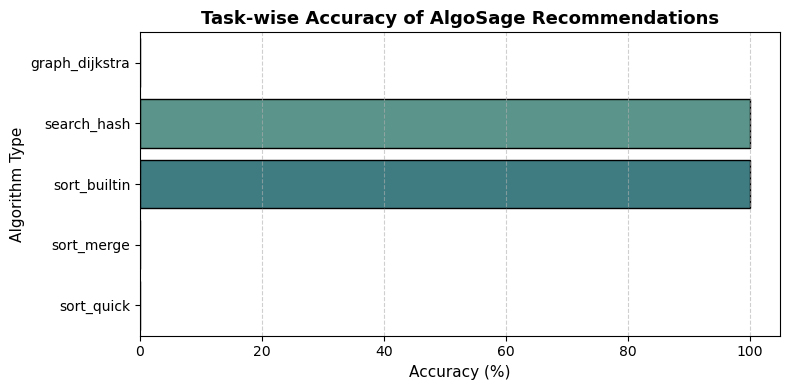


=== Accuracy by Algorithm Type ===
            label  Accuracy (%)
0  graph_dijkstra           0.0
1     search_hash         100.0
2    sort_builtin         100.0
3      sort_merge           0.0
4      sort_quick           0.0


In [5]:
accuracy_by_algo = df.groupby('label').apply(lambda x: (x['label'] == x['pred_label']).mean()*100).reset_index(name='Accuracy (%)')

plt.figure(figsize=(8,4))
sns.barplot(x='Accuracy (%)', y='label', data=accuracy_by_algo, palette='crest', edgecolor='black')
plt.title("Task-wise Accuracy of AlgoSage Recommendations", fontsize=13, fontweight='bold')
plt.xlabel("Accuracy (%)", fontsize=11)
plt.ylabel("Algorithm Type", fontsize=11)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.savefig("algosage_task_accuracy.png", dpi=300)
plt.show()

print("\n=== Accuracy by Algorithm Type ===")
print(accuracy_by_algo)
